In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [6]:
k = 10
num_problems = 2000
q_star = np.random.normal(0,1,(num_problems,k))
arms = [0]*k

In [7]:
arms

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [9]:
q_star.shape

(2000, 10)

In [10]:
for i in range(10):
    arms[i] = np.random.normal(q_star[0,1], 1 ,2000)

In [23]:
arms

[array([-0.87075443, -1.55782777,  0.00863908, ..., -1.89520874,
        -1.42842788, -1.63688166]),
 array([-0.3496815 ,  0.00678804, -2.06495766, ..., -1.3580733 ,
        -1.24233238, -0.63408542]),
 array([-1.26685795, -2.21335227, -0.82090547, ..., -0.58887325,
        -1.68300026, -1.82592464]),
 array([-1.72678633, -0.50464073, -1.37113766, ..., -0.75726183,
        -1.64153177, -0.85171983]),
 array([-2.34994524, -1.29691114, -0.83941564, ..., -3.51857128,
        -1.99169116, -0.85747177]),
 array([-0.91012744, -2.02567118, -1.37150298, ..., -0.80731261,
        -1.88727773, -0.97615484]),
 array([-0.98220878, -0.86627352, -2.19024753, ...,  0.52084553,
        -1.37667495, -1.74202469]),
 array([-3.28616474, -0.35773734, -0.77964481, ..., -3.44320171,
        -0.87767068, -0.5111707 ]),
 array([-0.98904927, -0.87675703, -0.03315818, ..., -1.46743113,
        -2.14120573, -2.63033845]),
 array([-1.65268081, -1.08552201,  0.19068849, ..., -1.62859435,
        -1.19265803, -0.62

In [24]:
q_star

array([[ 0.23409295, -1.15269653,  0.01463131, ...,  0.70891695,
        -2.74114152, -1.76839037],
       [-0.82899296,  0.48507245, -0.88685404, ...,  0.10938213,
        -0.83683674, -0.01208399],
       [-1.35338094, -0.36113466,  0.08779224, ..., -1.43453662,
        -1.07792651,  1.30882461],
       ...,
       [ 0.16346944,  1.63559276,  0.50536183, ...,  0.84678392,
         0.30620432, -1.05577031],
       [ 0.77499454, -0.87805982,  1.13951182, ...,  0.21546737,
        -0.04997949,  1.24154561],
       [-0.43690106, -0.00981156,  0.26742621, ...,  0.62294355,
         0.41008987, -1.43776325]])

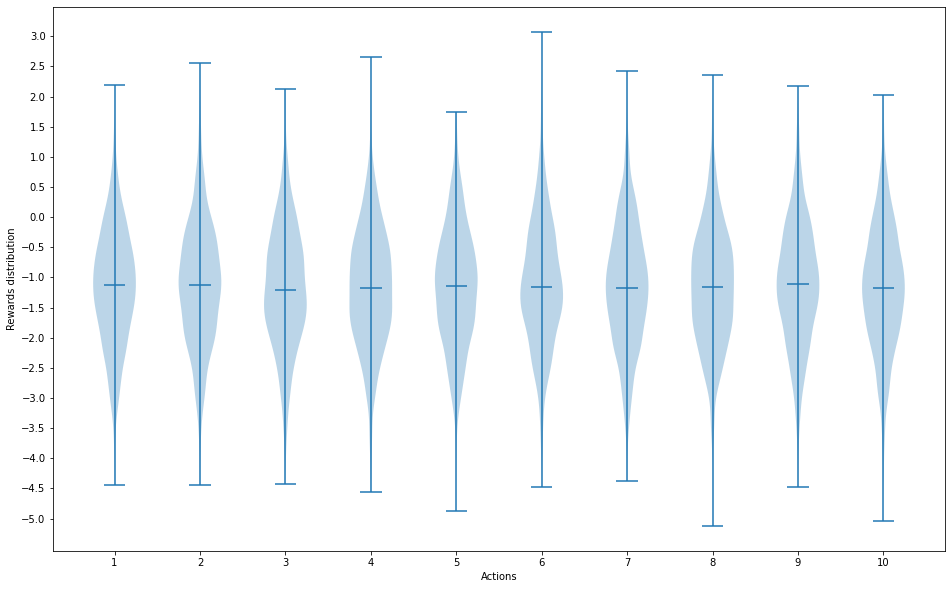

In [25]:
plt.figure(figsize=(16,10))
plt.ylabel('Rewards distribution')
plt.xlabel('Actions')
plt.xticks(range(1,11))
plt.yticks(np.arange(-5,5,0.5))
plt.violinplot(arms,positions=range(1,11), showmedians=True)
plt.show()


In [26]:
def bandit(action,problem):
    return np.random.normal(q_star[problem, action], 1)

In [27]:
def simple_max(Q, N, t):
    return np.random.choice(np.flatnonzero(Q == Q.max()))

In [ ]:
def simple_bandit(k, epsilon, steps, initial_Q, argmax_fn = simple_max):
    rewards = np.zeros(steps)
    actions = np.zeros(steps)
    
    for i in tqdm(range(num_problems)):
         